In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.feature_selection import RFE

data=pd.read_csv('day.csv')

In [3]:
data.describe()
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.shape

(730, 16)

In [5]:
data.drop(['instant', 'casual', 'dteday', 'registered'], axis=1, inplace=True)
data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
data.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [7]:
missinValues=data.isnull().sum()
print(missinValues)

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


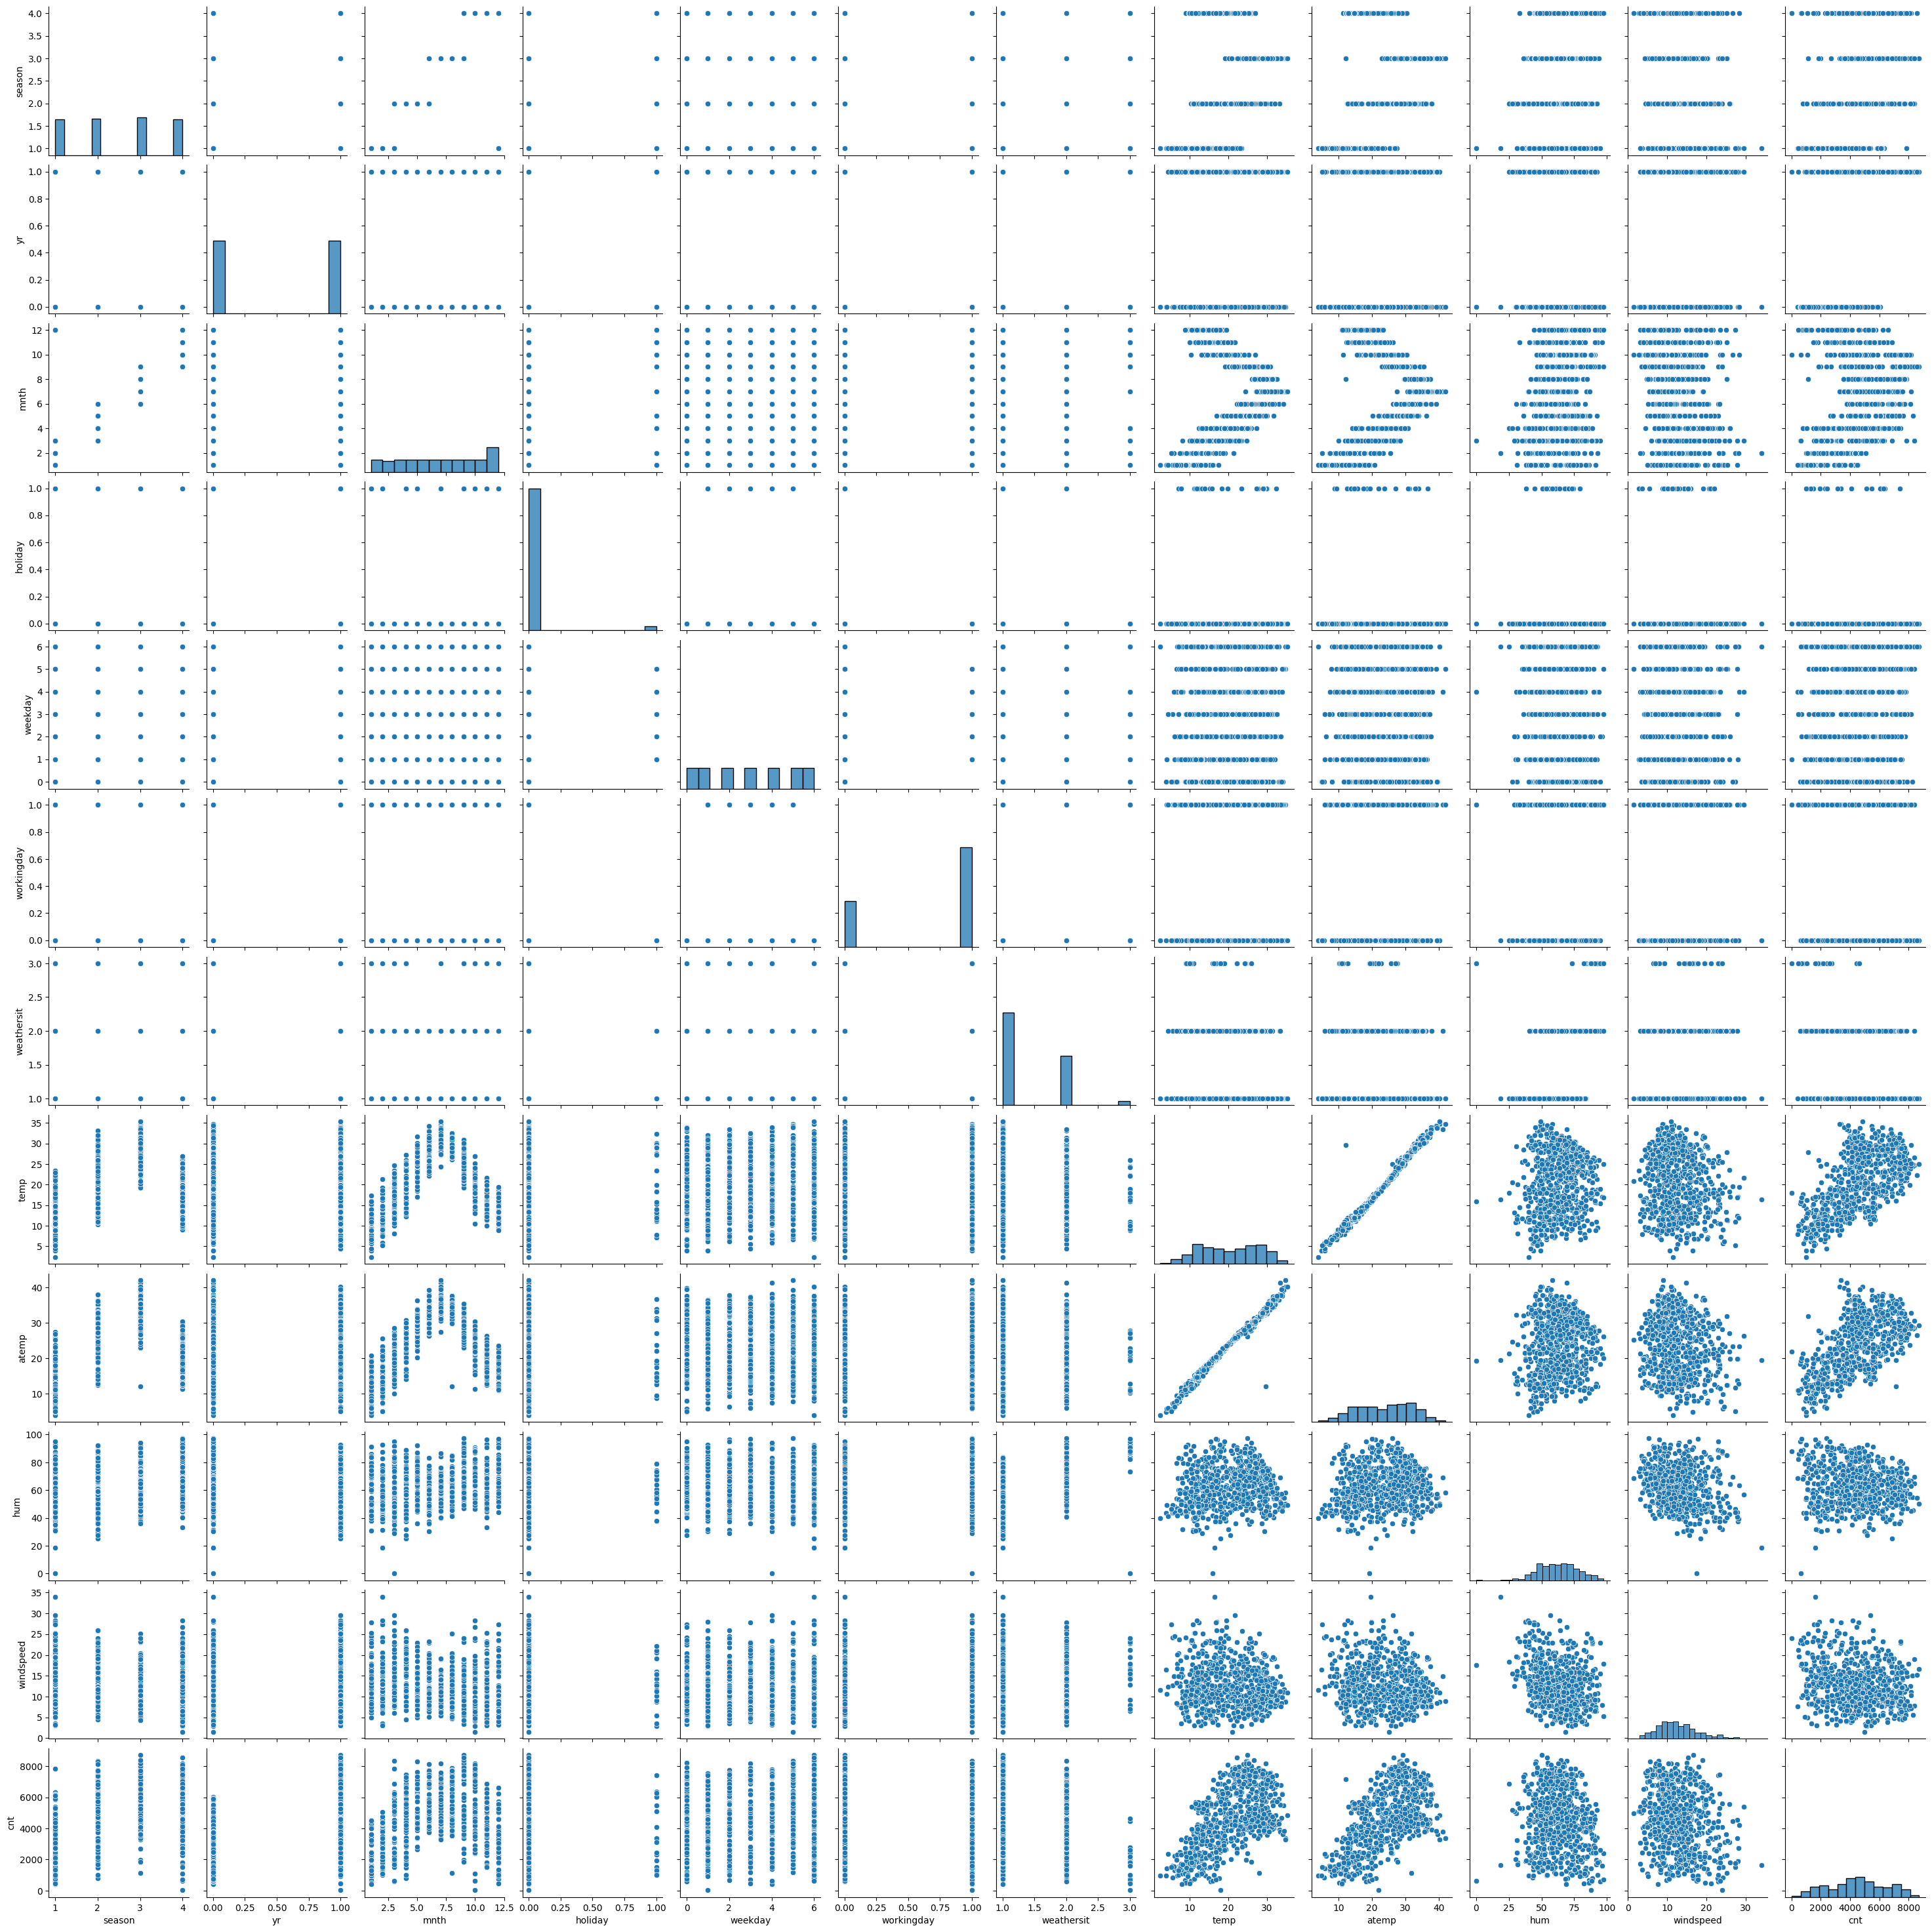

In [8]:
sns.pairplot(data)
plt.show()

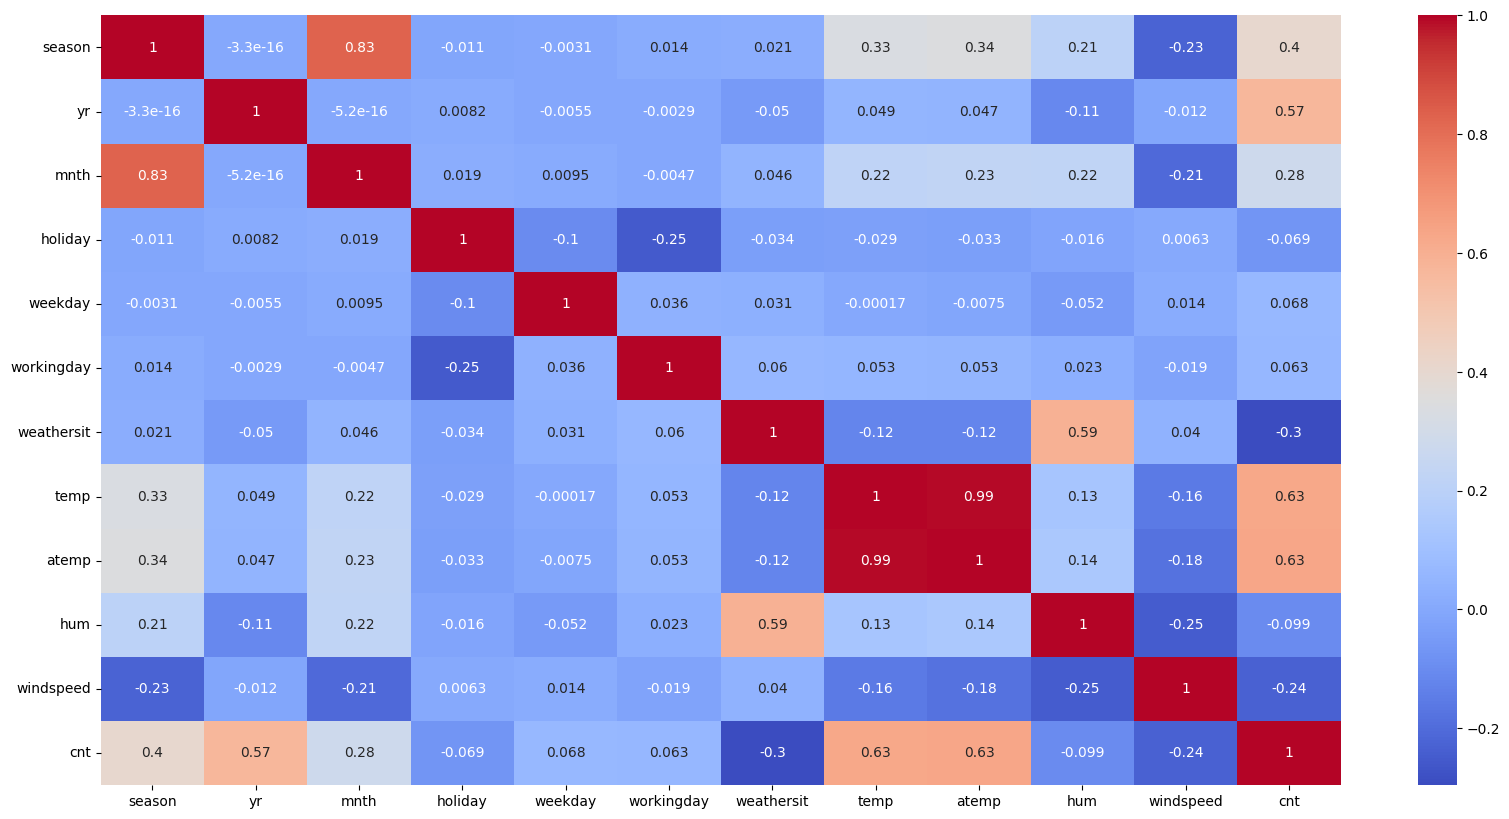

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

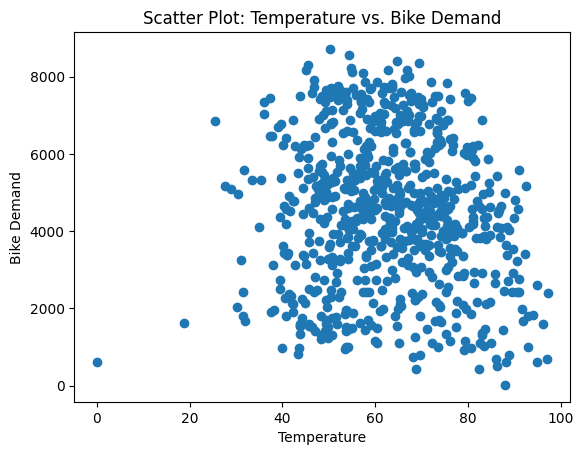

In [10]:
plt.scatter(data['hum'],data['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bike Demand')
plt.title('Scatter Plot: Temperature vs. Bike Demand')
plt.show()

In [11]:
data.shape

(730, 12)

In [12]:
max_thresold = data['temp'].quantile(0.95)
data[data['temp']>max_thresold]
min_thresold = data['temp'].quantile(0.05)
data[data['temp']<min_thresold]
data = data[(data['temp']<max_thresold) & (data['temp']>min_thresold)]

In [13]:
data.shape

(656, 12)

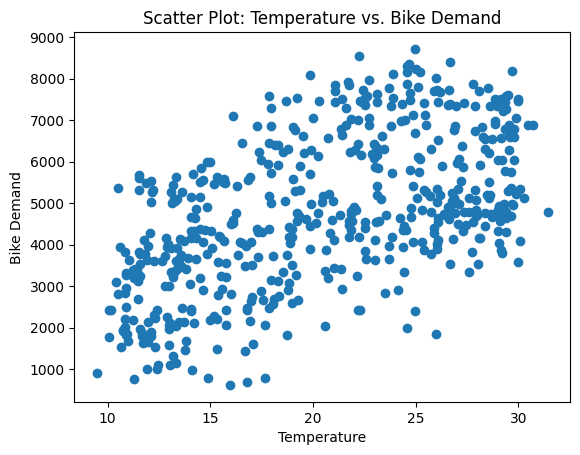

In [14]:
max_thresold = data['atemp'].quantile(0.95)
data[data['atemp']>max_thresold]
min_thresold = data['atemp'].quantile(0.05)
data[data['atemp']<min_thresold]
data = data[(data['atemp']<max_thresold) & (data['atemp']>min_thresold)]
max_thresold = data['windspeed'].quantile(0.95)
data[data['windspeed']>max_thresold]
min_thresold = data['windspeed'].quantile(0.05)
data[data['windspeed']<min_thresold]
data = data[(data['windspeed']<max_thresold) & (data['windspeed']>min_thresold)]
plt.scatter(data['temp'], data['cnt'])
# Set labels and title
plt.xlabel('Temperature')
plt.ylabel('Bike Demand')
plt.title('Scatter Plot: Temperature vs. Bike Demand')
# Display the plot
plt.show()

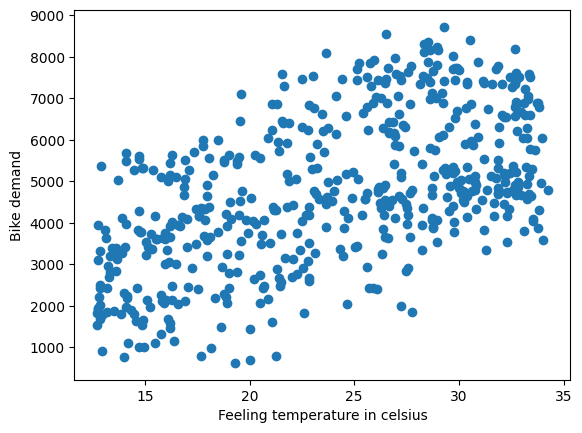

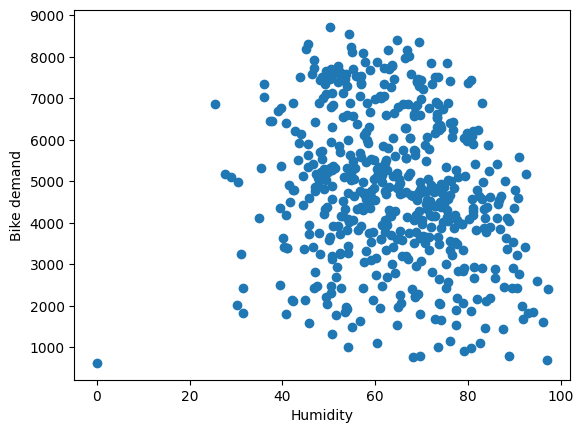

In [15]:
plt.scatter(data['atemp'], data['cnt'])
plt.xlabel('Feeling temperature in celsius')
plt.ylabel('Bike demand')
plt.show()
plt.scatter(data['hum'], data['cnt'])
plt.xlabel('Humidity')
plt.ylabel('Bike demand')
plt.show()

In [16]:
max_thresold = data['hum'].quantile(0.95)
max_thresold

87.69887999999999

In [17]:
data[data['hum']>max_thresold]
max_threshold = data['temp'].quantile(0.95)
data = data[data['temp'] <= max_threshold]

min_threshold = data['temp'].quantile(0.05)
data = data[data['temp'] >= min_threshold]

In [18]:
coorelation_matrix = data.corr()
coorelation_matrix

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,-0.035057,0.872365,-0.024871,0.000854,0.045281,0.100033,0.087098,0.090372,0.201048,-0.166347,0.236699
yr,-0.035057,1.000000,-0.086320,0.009366,-0.011700,-0.003485,-0.096659,-0.028722,-0.017350,-0.168792,-0.093903,0.642973
mnth,0.872365,-0.086320,1.000000,0.048576,0.018725,0.025719,0.073794,0.023936,0.025772,0.203958,-0.166949,0.133133
holiday,-0.024871,0.009366,0.048576,1.000000,-0.091575,-0.242525,-0.035791,-0.051814,-0.057924,-0.008391,0.085280,-0.105774
weekday,0.000854,-0.011700,0.018725,-0.091575,1.000000,0.047052,0.012302,0.010802,0.006067,-0.040248,0.001150,0.090694
workingday,0.045281,-0.003485,0.025719,-0.242525,0.047052,1.000000,0.085200,0.040639,0.038594,0.044533,-0.025059,0.013788
weathersit,0.100033,-0.096659,0.073794,-0.035791,0.012302,0.085200,1.000000,-0.022636,-0.034642,0.606845,0.005698,-0.335737
temp,0.087098,-0.028722,0.023936,-0.051814,0.010802,0.040639,-0.022636,1.000000,0.996095,0.177254,-0.112667,0.497111
atemp,0.090372,-0.017350,0.025772,-0.057924,0.006067,0.038594,-0.034642,0.996095,1.000000,0.176290,-0.128283,0.515370
hum,0.201048,-0.168792,0.203958,-0.008391,-0.040248,0.044533,0.606845,0.177254,0.176290,1.000000,-0.249395,-0.209155


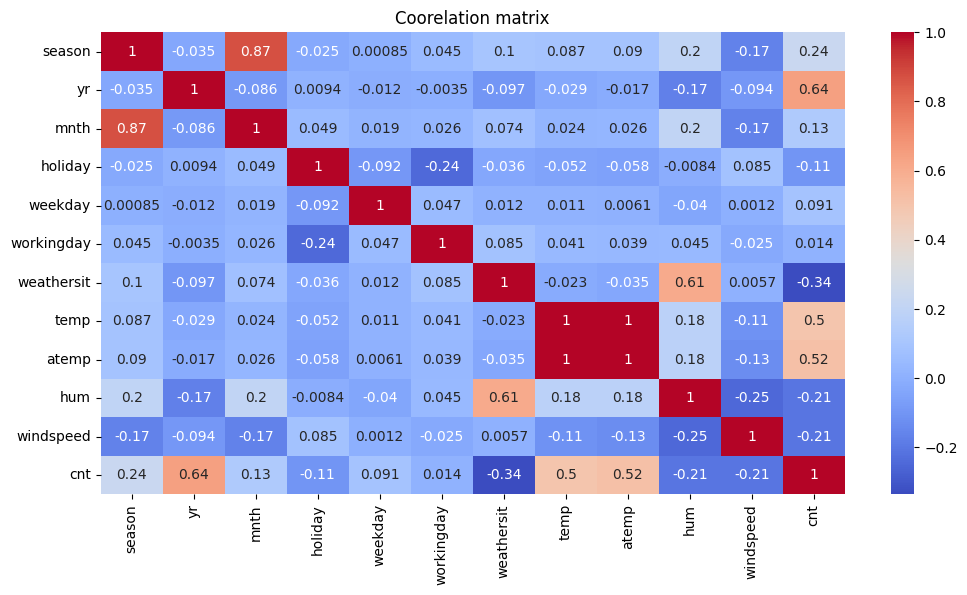

In [19]:
plt.figure(figsize = (12, 6))
sns.heatmap(coorelation_matrix, cmap= 'coolwarm', annot= True)
plt.title('Coorelation matrix')
plt.show()

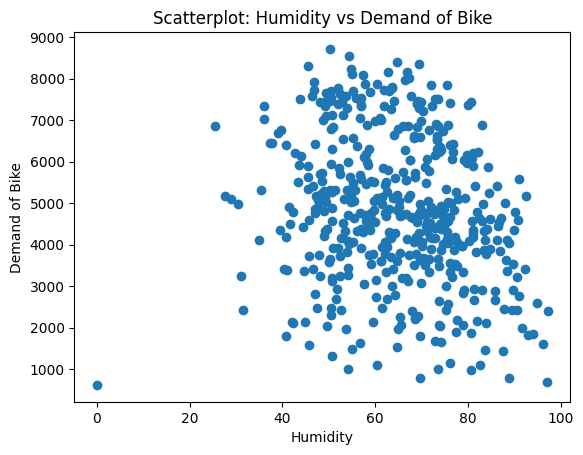

In [20]:
plt.scatter(data['hum'], data['cnt'])
plt.xlabel("Humidity")
plt.ylabel('Demand of Bike')
plt.title("Scatterplot: Humidity vs Demand of Bike")
plt.show()

In [21]:
data.mnth

0       1
1       1
18      1
36      2
43      2
       ..
715    12
716    12
717    12
718    12
723    12
Name: mnth, Length: 478, dtype: int64

In [22]:
def seasonname (x):
    if x == 1 : 
        return 'spring'
    elif x ==2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
    
data['season'] = data['season'].apply(seasonname)
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
18,spring,0,1,0,3,1,2,11.979134,14.92110,74.1739,13.957239,1650
36,spring,0,2,0,0,0,1,11.719153,14.58355,56.8333,9.500600,1623
43,spring,0,2,0,0,0,1,12.977402,16.20565,45.7391,17.479161,1589
...,...,...,...,...,...,...,...,...,...,...,...,...
715,winter,1,12,0,1,1,2,16.126653,20.07500,90.7083,6.583306,4585
716,winter,1,12,0,2,1,1,16.844153,20.48540,66.6250,14.834068,5557
717,winter,1,12,0,3,1,1,13.632500,17.10810,62.5417,12.334164,5267
718,winter,1,12,0,4,1,2,13.530000,16.76085,66.7917,8.875021,4128


In [23]:
def year (x):
    if x == 0 : 
        return '2018'
    else:
        return '2019'
data['yr'] = data['yr'].apply(year)
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
18,spring,2018,1,0,3,1,2,11.979134,14.92110,74.1739,13.957239,1650
36,spring,2018,2,0,0,0,1,11.719153,14.58355,56.8333,9.500600,1623
43,spring,2018,2,0,0,0,1,12.977402,16.20565,45.7391,17.479161,1589
...,...,...,...,...,...,...,...,...,...,...,...,...
715,winter,2019,12,0,1,1,2,16.126653,20.07500,90.7083,6.583306,4585
716,winter,2019,12,0,2,1,1,16.844153,20.48540,66.6250,14.834068,5557
717,winter,2019,12,0,3,1,1,13.632500,17.10810,62.5417,12.334164,5267
718,winter,2019,12,0,4,1,2,13.530000,16.76085,66.7917,8.875021,4128


In [24]:
def weekday (x):
    if x == 0 : 
        return 'sunday'
    elif x == 1:
        return 'monday'
    elif x ==2:
        return 'tuesday'
    elif x == 3:
        return 'wednesday'
    elif x == 4:
        return 'Thrusday'
    elif x == 5:
        return 'Friday'
    else:
        return 'Saturday'
data['weekday'] = data['weekday'].apply(weekday)
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
18,spring,2018,1,0,wednesday,1,2,11.979134,14.92110,74.1739,13.957239,1650
36,spring,2018,2,0,sunday,0,1,11.719153,14.58355,56.8333,9.500600,1623
43,spring,2018,2,0,sunday,0,1,12.977402,16.20565,45.7391,17.479161,1589
...,...,...,...,...,...,...,...,...,...,...,...,...
715,winter,2019,12,0,monday,1,2,16.126653,20.07500,90.7083,6.583306,4585
716,winter,2019,12,0,tuesday,1,1,16.844153,20.48540,66.6250,14.834068,5557
717,winter,2019,12,0,wednesday,1,1,13.632500,17.10810,62.5417,12.334164,5267
718,winter,2019,12,0,Thrusday,1,2,13.530000,16.76085,66.7917,8.875021,4128


In [25]:
def weathersit (x):
    if x == 1 : 
        return 'Clear'
    elif x == 2:
        return 'blurry'
    elif x ==3:
        return 'Snowy'
    else:
        return 'Rainy'
data['weathersit'] = data['weathersit'].apply(weathersit)
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,Saturday,0,blurry,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,sunday,0,blurry,14.902598,17.68695,69.6087,16.652113,801
18,spring,2018,1,0,wednesday,1,blurry,11.979134,14.92110,74.1739,13.957239,1650
36,spring,2018,2,0,sunday,0,Clear,11.719153,14.58355,56.8333,9.500600,1623
43,spring,2018,2,0,sunday,0,Clear,12.977402,16.20565,45.7391,17.479161,1589
...,...,...,...,...,...,...,...,...,...,...,...,...
715,winter,2019,12,0,monday,1,blurry,16.126653,20.07500,90.7083,6.583306,4585
716,winter,2019,12,0,tuesday,1,Clear,16.844153,20.48540,66.6250,14.834068,5557
717,winter,2019,12,0,wednesday,1,Clear,13.632500,17.10810,62.5417,12.334164,5267
718,winter,2019,12,0,Thrusday,1,blurry,13.530000,16.76085,66.7917,8.875021,4128


In [26]:
def month_name(x):
    if x == 1:
        return 'January'
    elif x == 2:
        return 'February'
    elif x == 3:
        return 'March'
    elif x == 4:
        return 'April'
    elif x == 5:
        return 'May'
    elif x == 6:
        return 'June'
    elif x == 7:
        return 'July'
    elif x == 8:
        return 'August'
    elif x == 9:
        return 'September'
    elif x == 10:
        return 'October'
    elif x == 11:
        return 'November'
    elif x == 12:
        return 'December'
    else:
        return None

data['mnth'] = data['mnth'].apply(month_name)
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,0,Saturday,0,blurry,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,0,sunday,0,blurry,14.902598,17.68695,69.6087,16.652113,801
18,spring,2018,January,0,wednesday,1,blurry,11.979134,14.92110,74.1739,13.957239,1650
36,spring,2018,February,0,sunday,0,Clear,11.719153,14.58355,56.8333,9.500600,1623
43,spring,2018,February,0,sunday,0,Clear,12.977402,16.20565,45.7391,17.479161,1589
...,...,...,...,...,...,...,...,...,...,...,...,...
715,winter,2019,December,0,monday,1,blurry,16.126653,20.07500,90.7083,6.583306,4585
716,winter,2019,December,0,tuesday,1,Clear,16.844153,20.48540,66.6250,14.834068,5557
717,winter,2019,December,0,wednesday,1,Clear,13.632500,17.10810,62.5417,12.334164,5267
718,winter,2019,December,0,Thrusday,1,blurry,13.530000,16.76085,66.7917,8.875021,4128


In [27]:
def holiday (x):
    if x == 0 : 
        return 'False'
    elif x == 1:
        return 'True'
    else:
        return None
data['holiday'] = data['holiday'].apply(holiday)
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,False,Saturday,0,blurry,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,False,sunday,0,blurry,14.902598,17.68695,69.6087,16.652113,801
18,spring,2018,January,False,wednesday,1,blurry,11.979134,14.92110,74.1739,13.957239,1650
36,spring,2018,February,False,sunday,0,Clear,11.719153,14.58355,56.8333,9.500600,1623
43,spring,2018,February,False,sunday,0,Clear,12.977402,16.20565,45.7391,17.479161,1589
...,...,...,...,...,...,...,...,...,...,...,...,...
715,winter,2019,December,False,monday,1,blurry,16.126653,20.07500,90.7083,6.583306,4585
716,winter,2019,December,False,tuesday,1,Clear,16.844153,20.48540,66.6250,14.834068,5557
717,winter,2019,December,False,wednesday,1,Clear,13.632500,17.10810,62.5417,12.334164,5267
718,winter,2019,December,False,Thrusday,1,blurry,13.530000,16.76085,66.7917,8.875021,4128


In [28]:
encodedMnth = pd.get_dummies(data['mnth'], prefix= 'month')
encodedMnth = encodedMnth.astype(int)
encodedMnth

,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
18,0,0,0,0,1,0,0,0,0,0,0,0
36,0,0,0,1,0,0,0,0,0,0,0,0
43,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,0,1,0,0,0,0,0,0,0,0,0
716,0,0,1,0,0,0,0,0,0,0,0,0
717,0,0,1,0,0,0,0,0,0,0,0,0
718,0,0,1,0,0,0,0,0,0,0,0,0


In [29]:
encodedWeekday = pd.get_dummies(data['weekday'], prefix= 'weekday')
encodedWeekday = encodedWeekday.astype(int)
encodedWeekday

,weekday_Friday,weekday_Saturday,weekday_Thrusday,weekday_monday,weekday_sunday,weekday_tuesday,weekday_wednesday
0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0
18,0,0,0,0,0,0,1
36,0,0,0,0,1,0,0
43,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
715,0,0,0,1,0,0,0
716,0,0,0,0,0,1,0
717,0,0,0,0,0,0,1
718,0,0,1,0,0,0,0


In [30]:
encodedHoliday = pd.get_dummies(data['holiday'], prefix= 'holiday')
encodedHoliday = encodedHoliday.astype(int)
# day_copy1 = pd.concat([day_copy, encodedHoliday], axis =1)
# day_copy1
encodedHoliday

,holiday_False,holiday_True
0,1,0
1,1,0
18,1,0
36,1,0
43,1,0
...,...,...
715,1,0
716,1,0
717,1,0
718,1,0


In [31]:
encodedWorkingDays = pd.get_dummies(data['workingday'], prefix= 'workingday')
encodedWorkingDays = encodedWorkingDays.astype(int)
# day_copy1 = pd.concat([day_copy, encoded_holiday], axis =1)
# day_copy1
encodedWorkingDays
#dummy variables for season
encodedSeason = pd.get_dummies(data['season'], prefix= 'season')
encodedSeason = encodedSeason.astype(int)
encodedSeason


,season_fall,season_spring,season_summer,season_winter
0,0,1,0,0
1,0,1,0,0
18,0,1,0,0
36,0,1,0,0
43,0,1,0,0
...,...,...,...,...
715,0,0,0,1
716,0,0,0,1
717,0,0,0,1
718,0,0,0,1


In [32]:
encodedWorkingDays

,workingday_0,workingday_1
0,1,0
1,1,0
18,0,1
36,1,0
43,1,0
...,...,...
715,0,1
716,0,1
717,0,1
718,0,1


In [33]:
encodedWeathersit = pd.get_dummies(data['weathersit'], prefix= 'weathersit')
encodedWeathersit = encodedWeathersit.astype(int)
# day_copy1 = pd.concat([day_copy, encoded_holiday], axis =1)
# day_copy1
encodedWeathersit

,weathersit_Clear,weathersit_Snowy,weathersit_blurry
0,0,0,1
1,0,0,1
18,0,0,1
36,1,0,0
43,1,0,0
...,...,...,...
715,0,0,1
716,1,0,0
717,1,0,0
718,0,0,1


In [34]:
encodedYear = pd.get_dummies(data['yr'], prefix= 'year')
encodedYear = encodedYear.astype(int)
encodedYear

,year_2018,year_2019
0,1,0
1,1,0
18,1,0
36,1,0
43,1,0
...,...,...
715,0,1
716,0,1
717,0,1
718,0,1


In [35]:
dataCopy =pd.concat([encodedYear,encodedMnth,encodedHoliday,encodedWeathersit,encodedWorkingDays,encodedSeason,encodedWeekday,data],axis=1)
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 723
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year_2018          478 non-null    int64  
 1   year_2019          478 non-null    int64  
 2   month_April        478 non-null    int64  
 3   month_August       478 non-null    int64  
 4   month_December     478 non-null    int64  
 5   month_February     478 non-null    int64  
 6   month_January      478 non-null    int64  
 7   month_July         478 non-null    int64  
 8   month_June         478 non-null    int64  
 9   month_March        478 non-null    int64  
 10  month_May          478 non-null    int64  
 11  month_November     478 non-null    int64  
 12  month_October      478 non-null    int64  
 13  month_September    478 non-null    int64  
 14  holiday_False      478 non-null    int64  
 15  holiday_True       478 non-null    int64  
 16  weathersit_Clear   478 non-null

In [36]:
dataCopy.drop(['weathersit','yr','mnth','holiday','weekday','season','workingday'],axis=1)

,year_2018,year_2019,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,...,weekday_Thrusday,weekday_monday,weekday_sunday,weekday_tuesday,weekday_wednesday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801
18,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,11.979134,14.92110,74.1739,13.957239,1650
36,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,11.719153,14.58355,56.8333,9.500600,1623
43,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,12.977402,16.20565,45.7391,17.479161,1589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,16.126653,20.07500,90.7083,6.583306,4585
716,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,16.844153,20.48540,66.6250,14.834068,5557
717,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,13.632500,17.10810,62.5417,12.334164,5267
718,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,13.530000,16.76085,66.7917,8.875021,4128


In [37]:
x=dataCopy.drop('cnt',axis=1)
y=dataCopy['cnt']

In [38]:
y

0       985
1       801
18     1650
36     1623
43     1589
       ... 
715    4585
716    5557
717    5267
718    4128
723    1013
Name: cnt, Length: 478, dtype: int64

In [39]:
xTest,xTrain,yTest,yTrain=train_test_split(x,y,test_size=0.4)

In [40]:
yTrain

683    5445
114    4073
626    7591
709    5501
474    7290
       ... 
318    4195
230    4153
441    5892
50     1812
510    6536
Name: cnt, Length: 192, dtype: int64

In [41]:
xTrain

,year_2018,year_2019,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
683,0,1,0,0,0,0,0,0,0,0,...,2019,November,False,Thrusday,1,blurry,13.188347,16.22460,62.0417,10.250129
114,1,0,1,0,0,0,0,0,0,0,...,2018,April,False,monday,1,Clear,24.873347,28.72500,77.6667,12.417311
626,0,1,0,0,0,0,0,0,0,0,...,2019,September,False,wednesday,1,Clear,22.652500,27.02020,53.6667,14.416725
709,0,1,0,0,1,0,0,0,0,0,...,2019,December,False,tuesday,1,blurry,14.486653,16.91815,59.6667,19.834479
474,0,1,1,0,0,0,0,0,0,0,...,2019,April,False,Friday,1,Clear,21.593347,25.78875,69.4583,10.041357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1,0,0,0,0,0,0,0,0,0,...,2018,November,False,tuesday,1,blurry,21.730000,25.37895,68.8750,13.375411
230,1,0,0,1,0,0,0,0,0,0,...,2018,August,False,Friday,1,blurry,28.085000,31.66105,72.2917,9.333636
441,0,1,0,0,0,0,0,0,0,1,...,2019,March,False,sunday,0,blurry,19.372500,23.20000,81.0000,8.501161
50,1,0,0,0,0,1,0,0,0,0,...,2018,February,False,sunday,0,Clear,11.693897,13.86650,40.7826,14.956745


In [58]:

xTrainReal=xTrain.drop(['yr','season','mnth','holiday','weekday','workingday','weathersit'],axis=1)


In [56]:
xTrainReal

,year_2018,year_2019,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,...,weekday_Thrusday,weekday_monday,weekday_sunday,weekday_tuesday,weekday_wednesday,holiday,temp,atemp,hum,windspeed
683,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,False,13.188347,16.22460,62.0417,10.250129
114,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,False,24.873347,28.72500,77.6667,12.417311
626,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,False,22.652500,27.02020,53.6667,14.416725
709,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,False,14.486653,16.91815,59.6667,19.834479
474,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,False,21.593347,25.78875,69.4583,10.041357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,False,21.730000,25.37895,68.8750,13.375411
230,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,False,28.085000,31.66105,72.2917,9.333636
441,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,False,19.372500,23.20000,81.0000,8.501161
50,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,False,11.693897,13.86650,40.7826,14.956745


In [61]:
xTrainReal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 683 to 510
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year_2018          192 non-null    int64  
 1   year_2019          192 non-null    int64  
 2   month_April        192 non-null    int64  
 3   month_August       192 non-null    int64  
 4   month_December     192 non-null    int64  
 5   month_February     192 non-null    int64  
 6   month_January      192 non-null    int64  
 7   month_July         192 non-null    int64  
 8   month_June         192 non-null    int64  
 9   month_March        192 non-null    int64  
 10  month_May          192 non-null    int64  
 11  month_November     192 non-null    int64  
 12  month_October      192 non-null    int64  
 13  month_September    192 non-null    int64  
 14  holiday_False      192 non-null    int64  
 15  holiday_True       192 non-null    int64  
 16  weathersit_Clear   192 non-nu